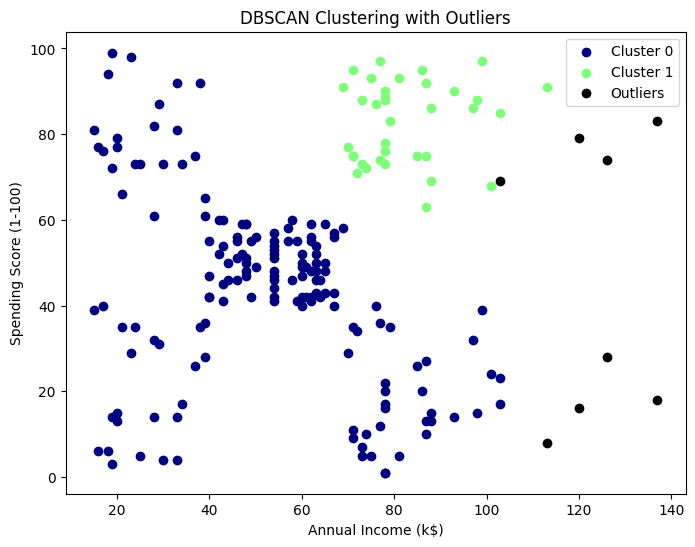

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

df = pd.read_csv("Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.jet(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]  # Black for outliers
    mask = labels == label
    plt.scatter(X["Annual Income (k$)"][mask], X["Spending Score (1-100)"][mask],
                c=[color], label=f'Cluster {label}' if label != -1 else "Outliers")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering with Outliers")
plt.legend()
plt.show()